- 진출 지점을 찾는 문제인것 같다.
- 빈칸 주워지는거 처리에 뇌정지가 잠깐 왔다.
- 0-indexed 문제 엄청 오랜만에 본다.

### 아이디어
- 다른 모든 구역에 도달할 수 있는 시작 구역 
  - 우선 연결 그래프가 아니라면 Confused를 반환해야 할 것이다. 고립된 노드로 진입할 방법이 없으니까.
  - 다음과 같은 구조도 가능하긴 할 것이다.
    - 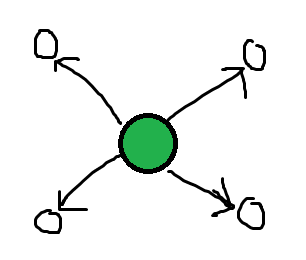
- union find?
- 진입 차수가 0인 SCC가 모든 SCC로 갈 수 있으면 그것이 정답일 것 같다.
- 진입 차수가 0인 SCC가 2개 이상이거나, union find 결과가 2개 이상이면 confused 이면 될 것 같다.

In [ ]:
import sys, os, io
input=io.BytesIO(os.read(0,os.fstat(0).st_size)).readline

class UF:
  def __init__(self, n):
    self.p = list(range(n))

  def find(self, a):
    a_ = a
    while a != self.p[a]:
      a = self.p[a]
    while a_ != a:
      self.p[a_], a_ = a, self.p[a_]
    return a

  def merge(self, a, b):
    self.p[self.find(b)] = self.find(a)

def tarjan(G): #O(N+M)
  SCC, S, P = [], [], []
  D = [0] * len(G)
 
  s = [*range(len(G))]
  while s:
    x = s.pop()
    if x < 0:
      d = D[~x] - 1
      if P[-1] > d:
        SCC.append(S[d:])
        del S[d:], P[-1]
        for x in SCC[-1]:
          D[x] = -1
    elif D[x] > 0:
      while P[-1] > D[x]:
        P.pop()
    elif D[x] == 0:
      S.append(x)
      P.append(len(S))
      D[x] = len(S)
      s.append(~x)
      s += G[x]
  return SCC[::-1]

def sol():
  N, M = map(int, input().split())
  G = [[] for _ in range(N)]
  for _ in range(M):
    u, v = map(int, input().split())
    G[u].append(v)
  
  SCC = {}
  for i, scc in enumerate(tarjan(G)): #O(1)만에 몇 번 SCC에 속하는지 찾을 수 있게 해싱한다. (O(N)
    for v in scc:
      SCC[v] = i 
  
  cnt = i + 1
  uf = UF(cnt)
  IN = [0] * (cnt) #i는 아낌없이 사용한다
  for i, V in enumerate(G): #O(N+M)
    for v in V:
      if SCC[i] != SCC[v]: #외부의 SCC를 가리키고 있는 것이라면
        uf.merge(SCC[i], SCC[v]) #
        IN[SCC[v]] += 1 #해당 SCC의 진입차수를 1 증가시킨다.
    
  if len(set(uf.find(i) for i in range(cnt))) == 1 and IN.count(0) == 1 :
    answer = []
    for k, v in SCC.items() :
      if v == 0 :
        answer.append(k)
    
    sys.stdout.write('\n'.join(map(str, sorted(answer))))
    sys.stdout.write('\n')
  else:
    sys.stdout.write('Confused\n')

T = int(input())
for t in range(T) :
  sol()
  if t != T - 1 :
    input()
    sys.stdout.write('\n')

- union find는 굳이 필요없었나보다. 

### 생성 AI의 대답
- SCC를 구하고, 진입 차수가 0인 SCC가 2개 이상이면 confused, 1개면 그것이 답이다.
  - 그렇다네요. 그런거 같기도 하구요